In [1]:
#import data
import pandas as pd
import numpy as np

In [2]:
#numpy
mat= np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
mat[mat[:,1]>2]=99
print(mat)

[[ 1  2  3]
 [99 99 99]
 [99 99 99]]


In [4]:
# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
'Location' : ["New York", "Paris", "Berlin", "London"],
'Age' : [24, 13, 53, 33]
}
data_pandas = pd.DataFrame(data)
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


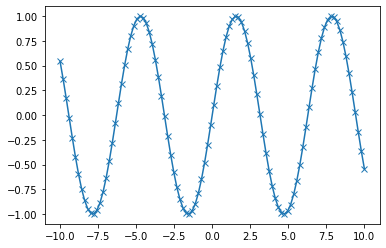

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100) #sequence number using numpy
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

# Machine Learning Demo
## Linear Regression

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [7]:
#import sklearn from scikit-learn
from sklearn import linear_model

#load dataset
house_price =  [245,312,279,308,199,219,405,324,319,255]
size = [1400,1600,1700,1875,1100,1550,2350,2450,1425,1700]

#reshape the inpur regression
size2= np.array(size).reshape(-1,1)
print(size)
print(size2)

[1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]
[[1400]
 [1600]
 [1700]
 [1875]
 [1100]
 [1550]
 [2350]
 [2450]
 [1425]
 [1700]]


In [8]:
#by using module in linear_model to fit the data
regr = linear_model.LinearRegression()
regr.fit(size2,house_price)
print('Coefficient: \n', regr.coef_)
print('intercept: \n',regr.intercept_)
print(regr.predict(size2)) #predict price

Coefficient: 
 [0.10976774]
intercept: 
 98.24832962138078
[251.92316258 273.87671015 284.85348393 304.06283805 218.99284123
 268.38832326 356.20251352 367.17928731 254.66735603 284.85348393]


In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score_r2 = r2_score(house_price, regr.predict(size2)) 
print('R square :',score_r2*100)
print('MSE :', mean_squared_error(house_price,regr.predict(size2)))

R square : 58.08173118722721
MSE : 1366.5565224307989


In [10]:
size_new = 1550
price = (size_new*regr.coef_)+regr.intercept_
print(price)
print(regr.predict([[size_new]]))

[268.38832326]
[268.38832326]


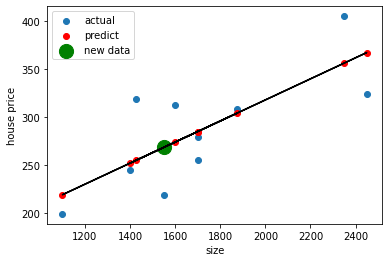

In [11]:
#plotting the prediction
plt.scatter(x=size2,y=house_price,label='actual')
plt.scatter(x=size2,y=regr.predict(size2),label='predict',color='red')
plt.scatter(x=size_new,y=price,s=200,color='green',label ='new data')
plt.legend(loc="upper left")
plt.xlabel('size')
plt.ylabel('house price')
x=size2
plt.plot(x, (x*regr.coef_)+regr.intercept_,color='black')

# Applied Machine Learning in Python

# Raw the data

# 1. Extract features
The data we will use for this example is the breast cancer dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the load_breast_cancer function:



In [12]:
#import data
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

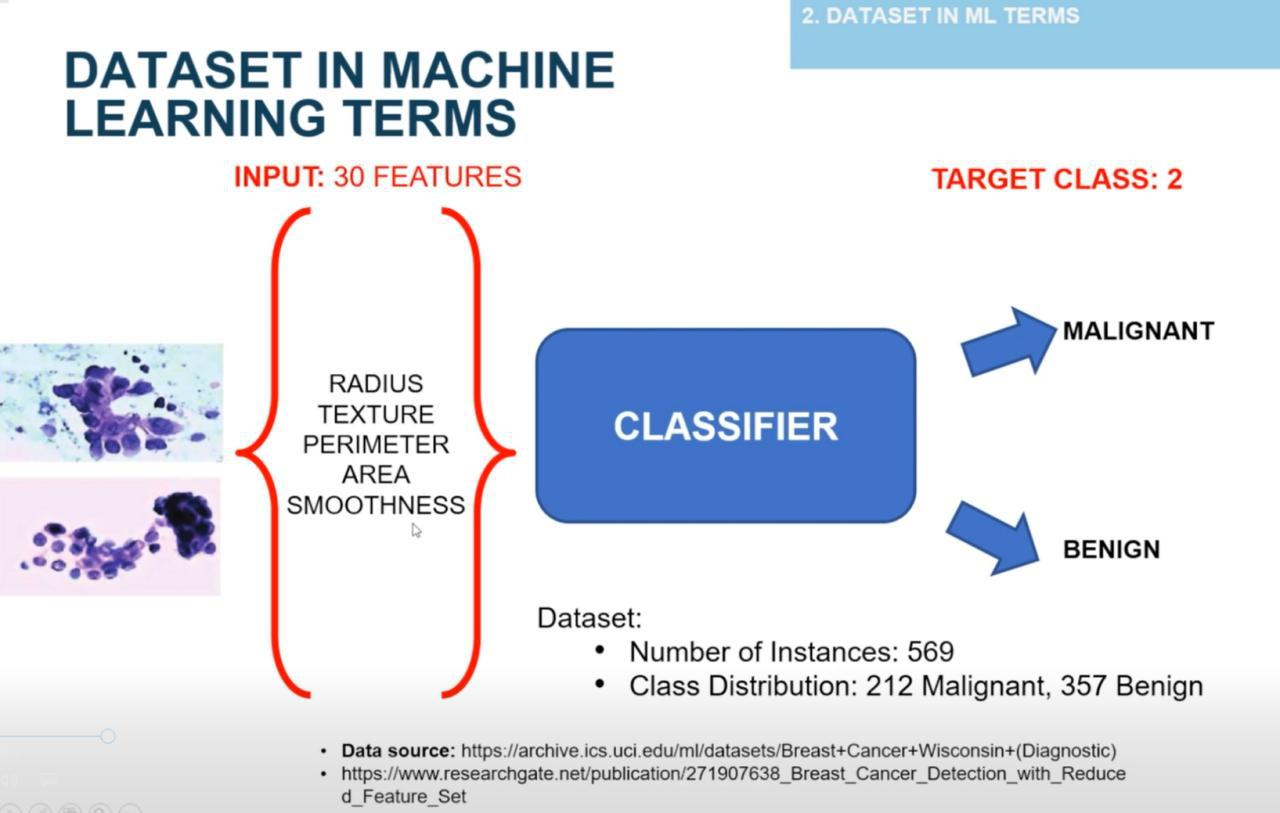

In [13]:
dataset = load_breast_cancer()
print(dataset.DESCR)
dataset.keys()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [15]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Dataset from sklearn not dataframe type
Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame.

Convert the sklearn.dataset cancer to a DataFrame.

In [17]:
def dataframe():
    
    # Your code here
#     print(len(cancer['feature_names']))
    columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    index = range(0, 569, 1)
    df = pd.DataFrame(data=dataset['data'], index=index, columns = columns[:30])
    df['target'] = dataset['target']
    ans = df
    
    return ans
cancerdf= dataframe()

In [18]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploration data
- check the missing data
- check data types
- insight data from visualization

In [19]:
cancerdf.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [20]:
cancerdf.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [21]:
#check target as category
cancerdf['target']=cancerdf['target'].astype('category')
cancerdf['target'].dtypes
#1 code 1 = benign
#2 code 0 = malignant

CategoricalDtype(categories=[0, 1], ordered=False)

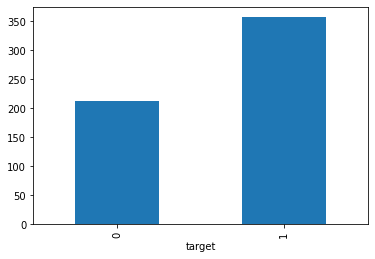

In [22]:
cancerdf.groupby('target').size().plot(kind='bar')

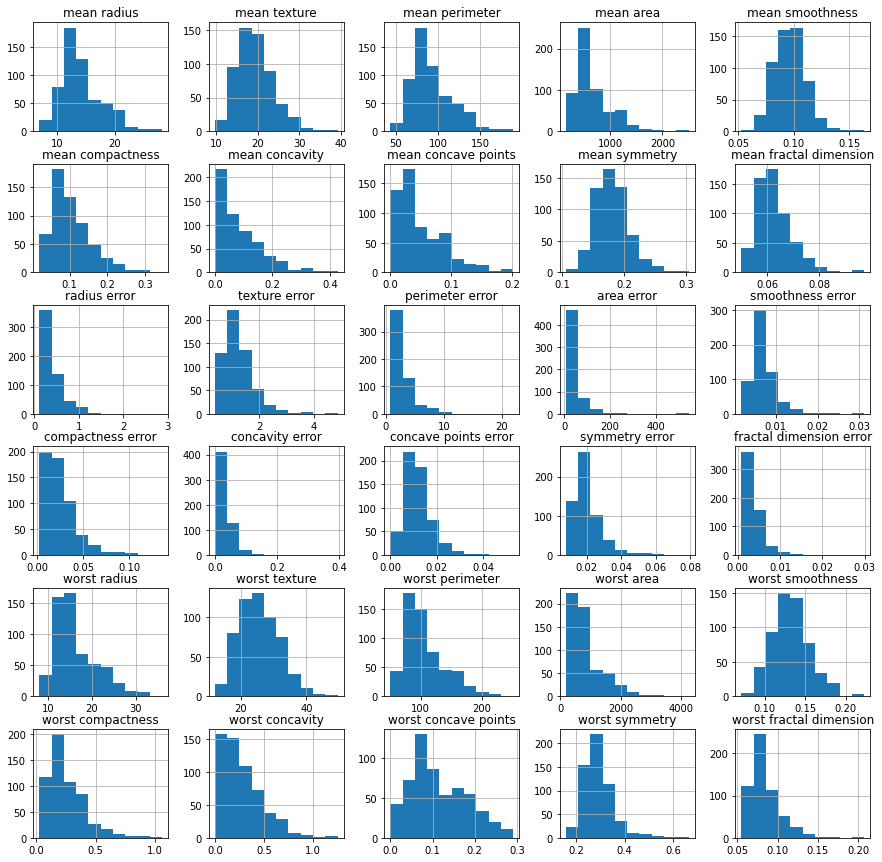

In [23]:
pd.DataFrame.hist(cancerdf, figsize = [15,15]);

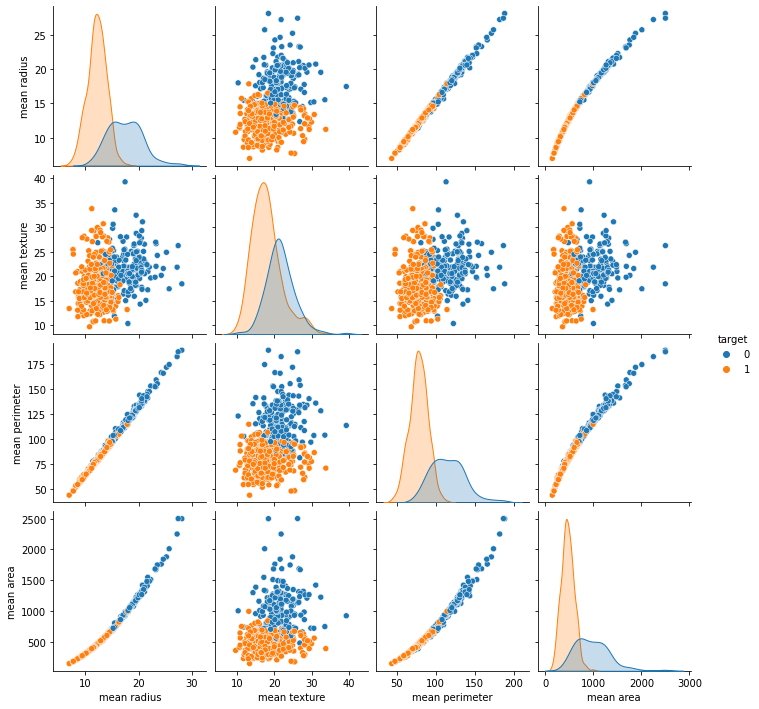

In [24]:
import seaborn as sns
sns.pairplot(data= cancerdf, hue='target',
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])

# 3. Split dataset
The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
We will do this using SciKit-Learn library in Python using the train_test_split method.

In [25]:
cancerdf.shape

(569, 31)

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
y=cancerdf.iloc[:,30]
X= cancerdf.iloc[:,0:30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


## Feature Scalling
This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

In [27]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train Model Selection

This is the most exciting phase in Applying Machine Learning to any Dataset. It is also known as Algorithm selection for Predicting the best results.
Usually Data Scientists use different kinds of Machine Learning algorithms to the large data sets. 

## Using Logistic Regression Algorithm to the Training Set

In [28]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
classifier_log.coef_

array([[-0.29792942, -0.58056355, -0.3109406 , -0.377129  , -0.11984232,
         0.42855478, -0.71131106, -0.85371164, -0.46688191,  0.11762548,
        -1.38262136,  0.0899184 , -0.94778563, -0.94686238,  0.18575731,
         0.99305313,  0.11090349, -0.3458275 ,  0.20290919,  0.80470317,
        -0.91626377, -0.91726667, -0.8159834 , -0.86539197, -0.45539191,
         0.10347391, -0.83009341, -0.98445173, -0.5920036 , -0.61086989]])

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

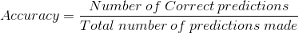

In [31]:
y_pred_log = classifier_log.predict(X_test)
#make confusin matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)
print('model logistic regression')
print(classification_report(y_test, y_pred_log,
	target_names=dataset.target_names))

[[50  3]
 [ 3 87]]
model logistic regression
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        53
      benign       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



## Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm

In [32]:

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred_knn = classifier_knn.predict(X_test)
#make confusin matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print('model knn')
print(classification_report(y_test, y_pred_knn,
	target_names=dataset.target_names))

[[47  6]
 [ 1 89]]
model knn
              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        53
      benign       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [34]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)


for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


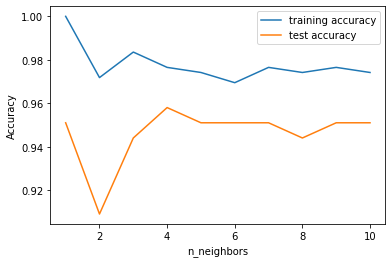

In [35]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_pred_NB = classifier_NB.predict(X_test)
#make confusin matrix
print('model NB')
print(classification_report(y_test, y_pred_NB,
	target_names=dataset.target_names))

model NB
              precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        53
      benign       0.93      0.93      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

